## Information Retrieval and Data Mining (Final)
### BDA-2008 group: Togzhan Baydish, Dias Ali, Aibolsyn Aibekqyzy
- I. Explore the dataset. Do the descriptive statistics.
- II. Explanatory data analysis. Exploring the features, visualizations etc. (https://www.kaggle.com/learn/data-visualization, https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15, https://www.mastersindatascience.org/learning/what-is-exploratory-data-analysis/ )
- III. Feature engineering. Encodings, generating the features from date-time, sum and from other columns. (https://www.kaggle.com/learn/feature-engineering, https://www.kaggle.com/learn/data-cleaning )
- IV. Supervised learning. Build model for prediction the gender of the clients. Decision Trees, KNN, Random Forest. Tune the hyper parameters, grid search, cross validation etc. Visualization of the models etc..
- V. Analyze models, Result comparison, ROC/AUC, precision and recall curves, deep analyzing.
- VI. Conclusion.



### I. Explore the dataset. Do the descriptive statistics.

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, precision_score, precision_recall_curve, PrecisionRecallDisplay

In [2]:
transactions = pd.read_csv('transactions.csv', sep = ";")
codes = pd.read_csv('codes.csv', sep = ";")
types = pd.read_csv('types.csv', sep = ";")
train = pd.read_csv('train_set.csv', sep=";")

In [3]:
data = transactions.set_index("client_id").join(train.set_index("client_id")).reset_index().dropna()
data.head()

,client_id,datetime,code,type,sum,target
0,22899,231 09:31:53,6011,2110,-6737.75,1.0
1,22899,349 16:34:52,6011,4010,-8759.07,1.0
2,22899,441 15:36:37,6011,4010,-8759.07,1.0
3,22899,167 09:50:12,4814,1030,-1122.96,1.0
4,22899,221 18:54:19,5399,1110,-4626.59,1.0


In [4]:
data.shape

(91826, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91826 entries, 0 to 130023
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   client_id  91826 non-null  int64  
 1   datetime   91826 non-null  object 
 2   code       91826 non-null  int64  
 3   type       91826 non-null  int64  
 4   sum        91826 non-null  float64
 5   target     91826 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 4.9+ MB


In [6]:
data.isnull().sum()

client_id    0
datetime     0
code         0
type         0
sum          0
target       0
dtype: int64

In [7]:
data.dropna().describe()

,client_id,code,type,sum,target
count,9.182600e+04,91826.000000,91826.000000,9.182600e+04,91826.000000
mean,5.169368e+07,5596.441389,2549.483403,-1.666997e+04,0.491266
std,2.839945e+07,602.144814,2295.581132,6.232297e+05,0.499926
min,2.289900e+04,742.000000,1010.000000,-4.150030e+07,0.000000
25%,2.736051e+07,5251.000000,1030.000000,-2.156079e+04,0.000000
50%,5.388370e+07,5661.000000,1110.000000,-5.239160e+03,0.000000
75%,7.552189e+07,6010.000000,2370.000000,-1.122960e+03,1.000000
max,9.999124e+07,9402.000000,8145.000000,6.737747e+07,1.000000


In [8]:
data.dropna(how="any", inplace=True)

In [9]:
data.shape

(91826, 6)

In [10]:
data.describe()

,client_id,code,type,sum,target
count,9.182600e+04,91826.000000,91826.000000,9.182600e+04,91826.000000
mean,5.169368e+07,5596.441389,2549.483403,-1.666997e+04,0.491266
std,2.839945e+07,602.144814,2295.581132,6.232297e+05,0.499926
min,2.289900e+04,742.000000,1010.000000,-4.150030e+07,0.000000
25%,2.736051e+07,5251.000000,1030.000000,-2.156079e+04,0.000000
50%,5.388370e+07,5661.000000,1110.000000,-5.239160e+03,0.000000
75%,7.552189e+07,6010.000000,2370.000000,-1.122960e+03,1.000000
max,9.999124e+07,9402.000000,8145.000000,6.737747e+07,1.000000


In [11]:
# To get dataset of only numbers
data_num = data.select_dtypes(include = ['float64', 'int64'])
data_num.head()

,client_id,code,type,sum,target
0,22899,6011,2110,-6737.75,1.0
1,22899,6011,4010,-8759.07,1.0
2,22899,6011,4010,-8759.07,1.0
3,22899,4814,1030,-1122.96,1.0
4,22899,5399,1110,-4626.59,1.0


In [12]:
# Get Most Frequent value for all columns
from pandas.api.types import is_categorical_dtype

for col in data.columns:
    print(col, end=' - \n')
    print('_' * 50)
    if col in ['Type description'] or is_categorical_dtype(col):
        display(pd.DataFrame(data[col].astype('str').value_counts().sort_values(ascending=False).head(3)))
    else:
        display(pd.DataFrame(data[col].value_counts().sort_values(ascending=False).head(5)))

client_id - 
__________________________________________________


,client_id
70780820,2777
87252636,497
76043922,463
29041434,442
53854864,380


datetime - 
__________________________________________________


,datetime
456 00:00:00,42
120 00:00:00,41
315 00:00:00,39
376 00:00:00,39
406 00:00:00,39


code - 
__________________________________________________


,code
6011,19538
6010,14093
4814,13044
5411,13003
4829,8134


type - 
__________________________________________________


,type
1010,21427
2010,14135
1030,12848
1110,12276
7070,9808


sum - 
__________________________________________________


,sum
-2245.92,5188
-11229.58,2643
-1122.96,2606
-22459.16,2582
-4491.83,2434


target - 
__________________________________________________


,target
0.0,46715
1.0,45111


### II. Exploratory data analysis. Exploring the features, visualizations etc.

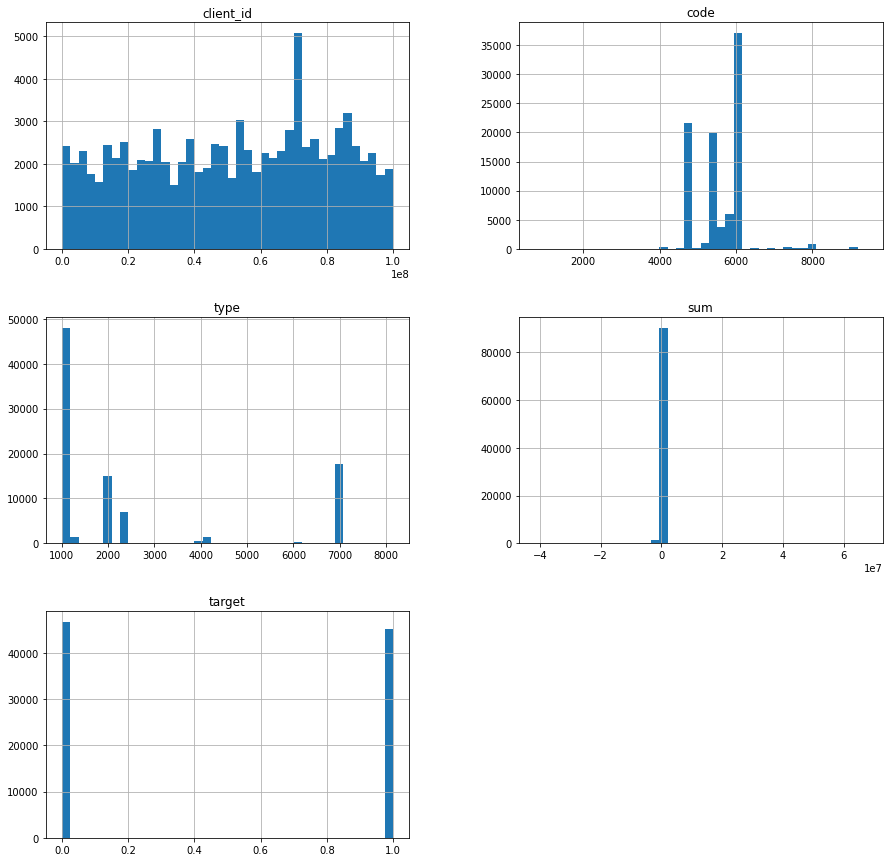

In [13]:
data_num.hist(figsize=(15, 15), bins=40); 

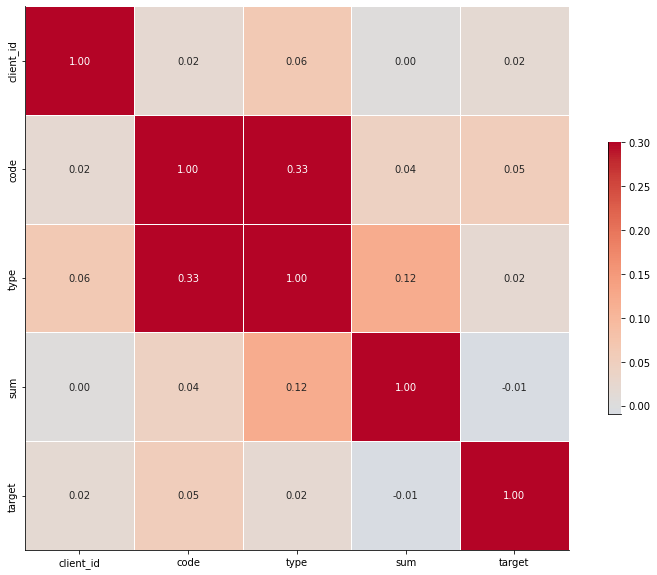

In [14]:
corr = data.corr()
g = sns.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(14,10)

plt.show()

In [15]:
z = data[data['sum']<0]
print(z)

        client_id      datetime  code  type        sum  target
0           22899  231 09:31:53  6011  2110   -6737.75     1.0
1           22899  349 16:34:52  6011  4010   -8759.07     1.0
2           22899  441 15:36:37  6011  4010   -8759.07     1.0
3           22899  167 09:50:12  4814  1030   -1122.96     1.0
4           22899  221 18:54:19  5399  1110   -4626.59     1.0
...           ...           ...   ...   ...        ...     ...
129994   99911226  259 15:16:17  5411  1010  -26629.82     0.0
130014   99967537  332 09:55:60  6011  2010 -336887.37     1.0
130019   99985917   61 11:42:26  6011  2010 -224591.58     0.0
130020   99991245  375 06:38:58  4829  2330  -67377.47     1.0
130021   99991245  292 11:20:02  5499  1010  -16574.86     1.0

[73733 rows x 6 columns]


In [16]:
z.shape[0]

73733

In [17]:
y = data[data['sum']>0]
print(y)

        client_id      datetime  code  type        sum  target
6           22899  352 10:45:57  6010  7071   17967.33     1.0
7           22899   61 20:53:04  6010  7030   22459.16     1.0
8           22899  344 11:45:23  6011  7010   44918.32     1.0
9           27914  292 10:50:34  6011  7010   11229.58     1.0
11          27914  141 13:20:55  6010  7020   67377.47     1.0
...           ...           ...   ...   ...        ...     ...
129946   99849205  409 14:44:35  6011  7010   24705.07     1.0
129971   99882949  393 08:59:16  6011  7010  224591.58     0.0
129973   99882949  119 07:09:44  6010  7070   73351.61     0.0
130022   99991245  306 06:18:20  6011  7010  561478.94     1.0
130023   99991245  306 06:20:43  6011  7010   92082.55     1.0

[18093 rows x 6 columns]


In [18]:
y.shape[0]

18093

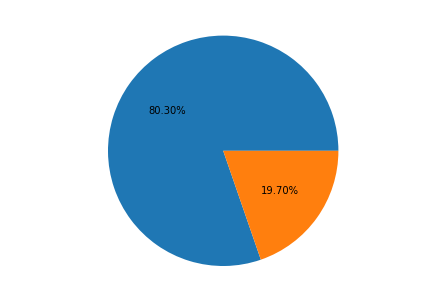

In [19]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
sum_2 = [z.shape[0],y.shape[0]]
count_sum = [z.shape[0],y.shape[0]]
ax.pie(count_sum,autopct='%1.2f%%')
plt.show()

### III. Feature engineering. 
#### Encodings, generating the features from date-time, sum and from other columns.

In [20]:
data[["day", "time"]] = data["datetime"].str.split(' ', 0, expand=True)
data[["hours", "minute", "seconds"]] = data["time"].str.split(':', 0, expand=True)

data.day = data.day.astype(int)
data.hours = data.hours.astype(int)
data.minute = data.minute.astype(int)
data.seconds = data.seconds.astype(int)
data.target = data.target.astype(int)

data["weekday"] = data.day % 7

data = data.drop(columns=["datetime", "time"])

print(data.dtypes)

data.head()

client_id      int64
code           int64
type           int64
sum          float64
target         int64
day            int64
hours          int64
minute         int64
seconds        int64
weekday        int64
dtype: object


,client_id,code,type,sum,target,day,hours,minute,seconds,weekday
0,22899,6011,2110,-6737.75,1,231,9,31,53,0
1,22899,6011,4010,-8759.07,1,349,16,34,52,6
2,22899,6011,4010,-8759.07,1,441,15,36,37,0
3,22899,4814,1030,-1122.96,1,167,9,50,12,6
4,22899,5399,1110,-4626.59,1,221,18,54,19,4


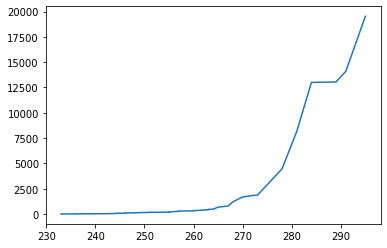

In [21]:
x = data['day'].value_counts()[:100]
y = data['code'].value_counts()[:100]
plt.plot(x,y)
plt.show()

Text(0.5, 1.0, 'Count of Days')

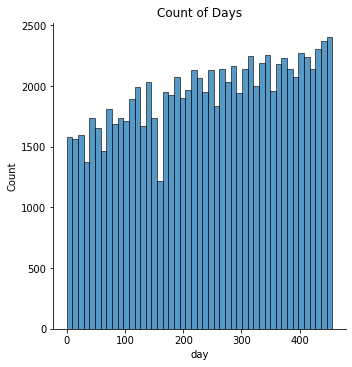

In [22]:
sns.displot(data['day'])
plt.title('Count of Days')

Text(0.5, 1.0, 'Count of Week Days')

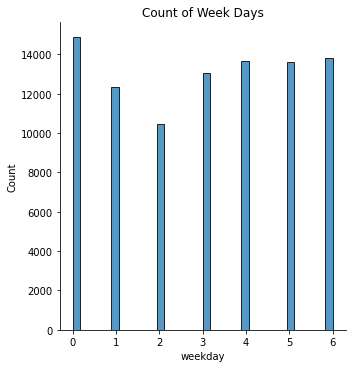

In [23]:
sns.displot(data['weekday'])
plt.title('Count of Week Days')

Text(0.5, 1.0, 'Count of Hours')

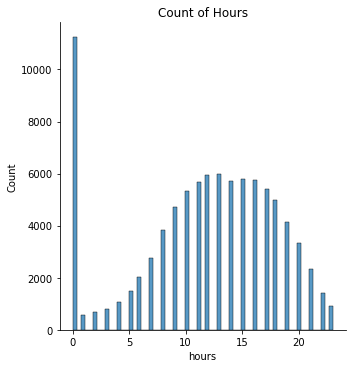

In [24]:
sns.displot(data['hours'])
plt.title('Count of Hours')

### IV. Supervised learning. 
#### Build model for prediction the gender of the clients. Decision Trees, KNN, Random Forest. Tune the hyper parameters, grid search, cross validation etc. Visualization of the models etc.

In [25]:
from sklearn.model_selection import train_test_split
X = data.drop(columns=["target"])
y = data["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
cross_val_score(clf, X, y, cv=10)

array([0.51181531, 0.49014483, 0.51083524, 0.49308505, 0.38712839,
       0.44059675, 0.49183184, 0.60313657, 0.42256589, 0.49302984])

In [27]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
cross_val_score(clf, X, y, cv=10)

array([0.51159752, 0.4599804 , 0.49058042, 0.48840248, 0.35816182,
       0.42110421, 0.49194075, 0.60422566, 0.42256589, 0.49259421])

In [28]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
cross_val_score(clf, X, y, cv=10)

array([0.51050855, 0.53740608, 0.54502886, 0.5228139 , 0.4006316 ,
       0.428727  , 0.4924853 , 0.61021564, 0.4613374 , 0.49281202])

### V. Analyze models, Result comparison, ROC/AUC, precision and recall curves, deep analyzing.

In [29]:
param_dist = {
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_depth": [1,2,3]
}
random_search = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=param_dist, n_iter=10)
random_search.fit(X_train, y_train)
random_search.best_params_

{'splitter': 'best', 'max_depth': 3, 'criterion': 'gini'}

ROC/AUC: 0.5333562679535987
Precision: 0.556589409575368


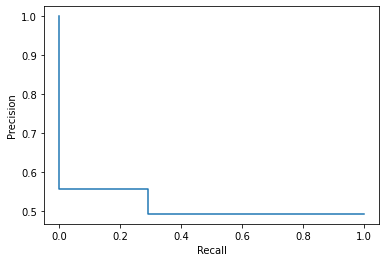

In [30]:
clf = DecisionTreeClassifier(splitter = 'best', max_depth = 3, criterion = 'entropy').fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("ROC/AUC:", roc_auc_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
precision, recall, _ = precision_recall_curve(y_test, y_pred)
PrecisionRecallDisplay(precision=precision, recall=recall).plot()

In [31]:
param_dist = {
    "n_neighbors": [1,2,3,4,5,6,7,8,9,10],
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"]
}
random_search = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_dist, n_iter=10)
random_search.fit(X_train, y_train)
random_search.best_params_

{'weights': 'uniform', 'n_neighbors': 1, 'algorithm': 'brute'}

ROC/AUC: 0.9049816169512355
Precision: 0.9028834247302318


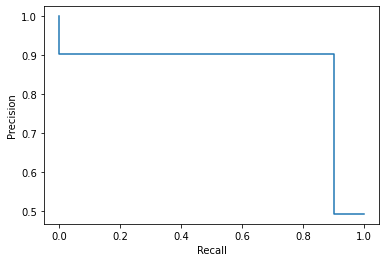

In [32]:
clf = KNeighborsClassifier(weights = 'uniform', n_neighbors = 1, algorithm = 'kd_tree').fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("ROC/AUC:", roc_auc_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
precision, recall, _ = precision_recall_curve(y_test, y_pred)
PrecisionRecallDisplay(precision=precision, recall=recall).plot()

In [33]:
param_dist = {
    "n_estimators": [100, 200, 300, 400],
    "criterion": ["gini", "entropy"]
}
random_search = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_dist, n_iter=1)
random_search.fit(X_train, y_train)
random_search.best_params_

{'n_estimators': 300, 'criterion': 'gini'}

ROC/AUC: 0.6582185657139086
Precision: 0.6746199536897212


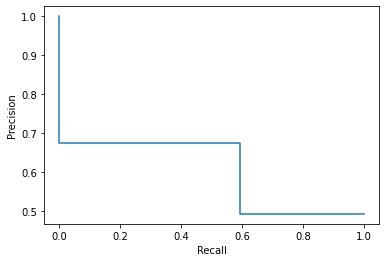

In [34]:
clf = RandomForestClassifier(n_estimators = 200, criterion = 'entropy').fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("ROC/AUC:", roc_auc_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
precision, recall, _ = precision_recall_curve(y_test, y_pred)
PrecisionRecallDisplay(precision=precision, recall=recall).plot()

In [35]:
param_dist = {
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_depth": [1,2,3]
}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_dist)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 3, 'splitter': 'best'}

ROC/AUC: 0.5333562679535987
Precision: 0.556589409575368


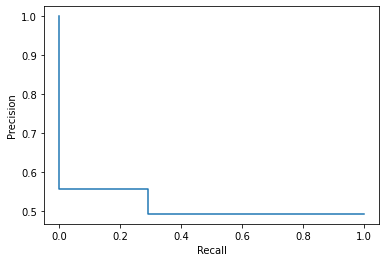

In [36]:
clf = DecisionTreeClassifier(splitter = 'best', max_depth = 3, criterion = 'gini').fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("ROC/AUC:", roc_auc_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
precision, recall, _ = precision_recall_curve(y_test, y_pred)
PrecisionRecallDisplay(precision=precision, recall=recall).plot()

In [37]:
param_dist = {
    "n_neighbors": [1,2,3,4],
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"]
}
grid_search = GridSearchCV(KNeighborsClassifier(), param_dist)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}

ROC/AUC: 0.9049816169512355
Precision: 0.9028834247302318


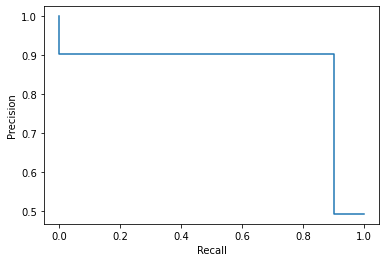

In [38]:
clf = KNeighborsClassifier(weights = 'uniform', n_neighbors = 1, algorithm = 'auto').fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("ROC/AUC:", roc_auc_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
precision, recall, _ = precision_recall_curve(y_test, y_pred)
PrecisionRecallDisplay(precision=precision, recall=recall).plot()

In [39]:
param_dist = {
    "n_estimators": [100, 200, 300, 400],
    "criterion": ["gini", "entropy"]
}
grid_search = GridSearchCV(RandomForestClassifier(), param_dist)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'criterion': 'entropy', 'n_estimators': 400}

ROC/AUC: 0.6583170960857924
Precision: 0.674439642175093


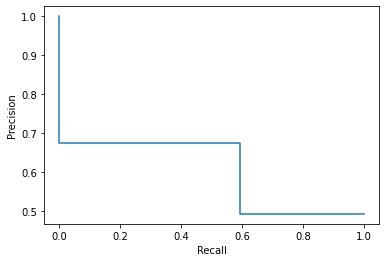

In [40]:
clf = RandomForestClassifier(n_estimators = 200, criterion = 'entropy').fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("ROC/AUC:", roc_auc_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
precision, recall, _ = precision_recall_curve(y_test, y_pred)
PrecisionRecallDisplay(precision=precision, recall=recall).plot()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d265a561-830e-44f2-acfb-5523f0a1a222' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>